In [ ]:
import plotly
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd

time_data=pd.read_csv("F:\\semester 8\\Advanced Analytics\\package\\case_time_series.csv")
time_data.head()
time_data.columns

colors=['#FD3216','#00B5F7','#1CBE4F','rgb(179,179,179)']
fig = go.Figure()
fig.add_trace(go.Scatter(x= time_data['Date'],y = time_data['Total Confirmed'],name='Confirmed',marker={'color': colors[0]}))
fig.add_trace(go.Scatter(x= time_data['Date'],y = time_data['Total Active'],name='Active',marker={'color': colors[1]}))
fig.add_trace(go.Scatter(x= time_data['Date'],y = time_data['Total Recovered'],name='Recovered',marker={'color': colors[2]}))
fig.add_trace(go.Scatter(x= time_data['Date'],y = time_data['Total Deceased'],name='Deceased',marker={'color': colors[3]}))

fig.update_xaxes(tickfont=dict(family="Courier New, monospace", color='#222A2A', size=12))
fig.update_yaxes(tickfont=dict(family="Courier New, monospace", color='#222A2A', size=12))

fig.layout.update(
    title="Covid-19 Cases in India",
    xaxis_title="Dates",
    yaxis_title="No. of cases",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f")
    )
chart_studio.tools.set_credentials_file("apeaksa","yNP8lAJFtNfKrwPkd4Fh")
url_1 = py.plot(fig, filename='Covid-19_plot', auto_open=True)


In [ ]:
import chart_studio.plotly as py
data= pd.read_csv("F:\\semester 8\\Advanced Analytics\\package\\state_wise.csv")
data.head()
data=data[data.columns[:6]]
s_data=data.drop(data.index[0])

colors=['#FD3216','#00B5F7','#1CBE4F','rgb(179,179,179)']

fig = go.Figure()
fig.add_trace(go.Bar(x= s_data['Confirmed'],y = s_data['State'],name='Confirmed',marker={'color':'#FD3216' },orientation='h'))
fig.add_trace(go.Bar(x=  s_data['Active'],y = s_data['State'],name='Active',marker={'color': colors[1]},orientation='h'))
fig.add_trace(go.Bar(x=  s_data['Recovered'],y = s_data['State'],name='Recovered',marker={'color': colors[2]},orientation='h'))
fig.add_trace(go.Bar(x=  s_data['Deaths'],y = s_data['State'],name='Deceased',marker={'color': colors[3]},orientation='h'))

fig.update_layout(barmode='group')

fig.update_xaxes(tickfont=dict(family="Courier New, monospace", color='#222A2A', size=10))
fig.update_yaxes(tickfont=dict(family="Courier New, monospace", color='#222A2A', size=10),tickmode='linear')

fig.layout.update(
    title="'Total Confirmed Cases Statewise'",
    yaxis_title="State",
    xaxis_title="No. of Confirmed cases",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f")
    )

url_2 = py.plot(fig, filename='Confirmed_plot_statewise', auto_open=True)


In [ ]:
import plotly
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd

t_c=data.iloc[0,1]
t_a=data.iloc[0,4]
t_r=data.iloc[0,2]
t_d=data.iloc[0,3]

fig=go.Figure()

fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = t_c,
))

fig.show()

In [ ]:
group_labels = ['Active','Recovered','Deceased']
values=[data['Active'][0], data['Recovered'][0], data['Deaths'][0]]
colors=['#19D3F3','#B6E880','#FD3216']

fig = go.Figure(data=[go.Pie(labels=group_labels, values=values,marker={'colors': colors})])

url_3 = py.plot(fig, filename='Pie_chart', auto_open=False)

<Figure size 432x288 with 0 Axes>

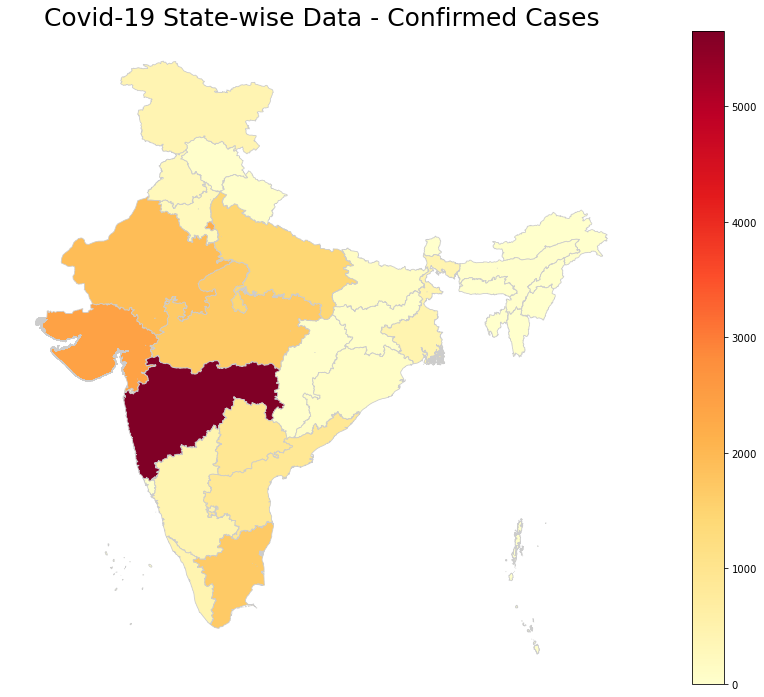

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import geopandas as gpd
import plotly.express as px
import plotly.offline as py
from PIL import Image

map_data = gpd.read_file('F:\semester 8\Advanced Analytics\package\Indian_States.shp')
map_data.rename(columns = {'st_nm':'State'}, inplace = True)
map_data.head()

map_data['State'] = map_data['State'].str.replace('&', 'and')
map_data['State'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['State'].replace('Dadara and Nagar Havelli', 'Dadra and Nagar Haveli', inplace = True)
map_data['State'].replace('Andaman and Nicobar Island', 'Andaman and Nicobar Islands', inplace = True)
map_data['State'].replace('NCT of Delhi', 'Delhi', inplace = True)

m_data=data.drop(data.index[0])

merged_data = pd.merge(map_data, m_data, how = 'left', on = 'State')
merged_data.fillna(0, inplace = True)
#merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

fig=plt.figure()
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 State-wise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.savefig('F:\semester 8\Advanced Analytics\package\plot.jpg')




In [ ]:
import chart_studio.plotly as py

from skimage import io
img = io.imread('F:\semester 8\Advanced Analytics\package\kmf.jpg')
fig = px.imshow(img)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)



# Export plot to plotly
url_5 = py.plot(fig, filename="kmf_plot")

In [ ]:
layout = go.Layout(
    title = 'Overview',
    xaxis = go.XAxis(
        title = 'Time',
        showticklabels=False),
    yaxis = go.YAxis(
        title = 'Age'
    )
)

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(time_data['Total Confirmed'],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
forecast= results.predict(start=len(time_data['Total Confirmed']), end=len(time_data['Total Confirmed'])+10)
colors=['#FF9616','#FB0D0D']

In [ ]:
from plotly.subplots import make_subplots

fig =go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(time_data['Total Confirmed']))),y = time_data['Total Confirmed'],name='Confirmed',marker={'color': colors[0]}))
fig.add_trace(go.Scatter(x=list(range(len(time_data['Total Confirmed']),len(time_data['Total Confirmed'])+10)),y = forecast,name='Forecasted',marker={'color': colors[1]}))

fig.layout.update(
    title="Covid-19 Cases in India",
    yaxis_title="No. of Cases",
    xaxis_title="No. of Days",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f")
    )
plotly.tools.set_credentials_file("apeaksa","yNP8lAJFtNfKrwPkd4Fh")
url_4 = py.plot(fig, filename='Forecasted_plot', auto_open=False)
py.iplot(fig, filename='Forecasted_plot')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 450,
    title = {'text': "Speed"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

In [ ]:
import chart_studio.dashboard_objs as dashboard
import IPython.display
from IPython.display import Image

my_dboard = dashboard.Dashboard()
my_dboard.get_preview()

In [ ]:
import re

def fileId_from_url(url):
    raw_fileId = re.findall("~[A-z]+/[0-9]+", url)[0][1: ]
    return raw_fileId.replace('/', ':')

def sharekey_from_url(url):
    if 'share_key=' not in url:
        return "This url is not 'sercret'. It does not have a secret key."
    return url[url.find('share_key=') + len('share_key='):]

fileId_1 = fileId_from_url(url_1)
fileId_2 = fileId_from_url(url_2)
fileId_3 = fileId_from_url(url_1)
fileId_4 = fileId_from_url(url_2)

box_a = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:37',
    'title': 'Confirmed cases'
}

box_b = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:6',
    'title': 'State_wise plot'
}

box_c = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:20',
    'title': 'Covid-19 Plot'
}

box_d = {
    'type': 'box',
    'boxType': 'plot',
    'fileId':'apeaksa:27',
    'title': 'India chart'
}



In [ ]:
box_a = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:38',
    'title': 'Active Cases'
}

box_b = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:39',
    'title': 'Recovered Cases'
}

box_c = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:40',
    'title': 'Deceased Cases'
}

In [ ]:
my_dboard.insert(box_a)
my_dboard.insert(box_b, 'below', 1,fill_percent=90)
my_dboard.insert(box_c, 'below', 2,fill_percent=60)
my_dboard.insert(box_d, 'below', 3,fill_percent=50)

In [ ]:
my_dboard.insert(box_a, 'right', 1,fill_percent=75)
my_dboard.insert(box_b, 'right',2,fill_percent=75)
my_dboard.insert(box_c, 'right',3,fill_percent=50)

In [ ]:
box_a = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:42',
    'title': 'State_Data'
}


In [ ]:
box_b = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:13',
    'title': 'Pie Chart'
}

box_c = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:17',
    'title': 'Forecasted Chart'
}

In [ ]:
box_b = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:34',
    'title': 'kmf_survival_plot'
}

box_c = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'apeaksa:28',
    'title': 'survival_probability'
}

In [ ]:
my_dboard.insert(box_a, 'right', 5,fill_percent=40)
my_dboard.insert(box_b, 'right', 7,fill_percent=40)
my_dboard.insert(box_c, 'below', 8,fill_percent=50)
my_dboard.insert(box_b, 'right', 10,fill_percent=40)
my_dboard.insert(box_c, 'below', 11,fill_percent=50)

In [ ]:
my_dboard.insert(box_b, 'right', 10,fill_percent=40)
my_dboard.insert(box_c, 'below', 11,fill_percent=50)
my_dboard.get_preview()

In [ ]:
my_dboard['settings']['title'] = 'Covid-19 Tracker India'

In [ ]:
my_dboard['settings']['logoUrl'] = 'https://thumbs.dreamstime.com/b/caution-stop-covid-new-china-coronavirus-concept-vector-illustration-172377358.jpg'

In [ ]:
my_dboard['settings']['foregroundColor'] = '#000000'
my_dboard['settings']['backgroundColor'] = '#ffffff'
my_dboard['settings']['headerForegroundColor'] = '#ffffff'
my_dboard['settings']['headerBackgroundColor'] = '#72B7B2'
my_dboard['settings']['boxBackgroundColor'] = '#72B7B2'
my_dboard['settings']['boxBorderColor'] = '#000000'
my_dboard['settings']['boxHeaderBackgroundColor'] = '#ffffff'

In [ ]:
my_dboard['settings']['fontFamily'] = 'Raleway'
my_dboard['settings']['headerFontSize'] = '1.6em'
my_dboard['settings']['headerFontWeight'] = '200'

In [ ]:
stacked_dboard = dashboard.Dashboard()
text_box = {
    'type': 'box',
    'boxType': 'text',
    'text': 'empty space'
}
for _ in range(5):
    stacked_dboard.insert(text_box, 'below', 1)

In [ ]:
stacked_dboard['layout']['size'] = 2000

In [ ]:
import chart_studio.plotly as py
py.dashboard_ops.upload(my_dboard, 'Covid-19 Tracker India')

'https://plotly.com/~apeaksa/45/covid-19-tracker-india/'